# Modeling - Decision Tree



What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

Why do we care?
- we can predict future target variables based on the model we build! 

How does it work?
- [slides we already saw](https://docs.google.com/presentation/d/12Sl-6X5hVJPXGel0-cMeWVI_iw4DDWQiXXrvU_o17gY/edit?usp=sharing)

How do we use it?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
    - create rules based on our input data
- evaluate models on validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

## Show us!

In [506]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import acquire
import prepare

## Example - simple

#### SKLEARN Modeling Process
0. split into features and target variable
1. make the object
2. fit the object
3. transform the object

In [507]:
# Example data from the lesson
df = pd.read_csv(
    StringIO('''
Yes,Yes,7,No
Yes,No,12,No
No,Yes,18,Yes
No,Yes,35,Yes
Yes,Yes,38,Yes
Yes,No,50,No
No,No,83,No
        '''), 
    names=['loves_cats','loves_dogs','age', 'loves_nicholas_cage'])

In [508]:
#look at the data


#### 0. split into features and target variable
- X 
- y 

In [509]:
#lets just use age


In [510]:
#isloate target variable


Note: 

#### 1. make the object

- the object we are making is our decision tree 
- none of our data is input during this phase
- this is initializing the algorithm

In [521]:
#import! 


In [522]:
#make it!


#### 2. fit the object

- now we fit our decision tree object to our features and target variable
- we do not need to save over our variable, it has been altered
- this is creating our model

In [523]:
# fit it!


#### 3. transform the object
- there are different ways to transform the object
- `.score` will return us the accuracy of our model

In [524]:
#transform it!


## Example - Iris Dataset

See it in the data science pipeline!

### Acquire

In [529]:
#get my iris data


In [530]:
#look at it


### Prepare

In [532]:
#clean my data


In [533]:
#split my data


In [534]:
#look at my train


### Explore

completed the following steps on my features and target variable
1. 
2. 
3. 
4. 

these steps arent written out here, however, i found that petal width and petal length identified species the most

### Model

Before we put anything into our machine learning model, we will want to establish a baseline predication

#### Baseline

In [537]:
#find most common species


Since there is not a most common class, it doesn't matter which one we choose.  

In [538]:
#calculate baseline accuracy


#### 0. split into features and target variable
- need to do this on my train, validate, and test dataframe
- will end up with the following variables:
    - X_train, X_validate, X_test: all the features we plan to put into our model
    - y_train, y_validate, y_test: the targete variable

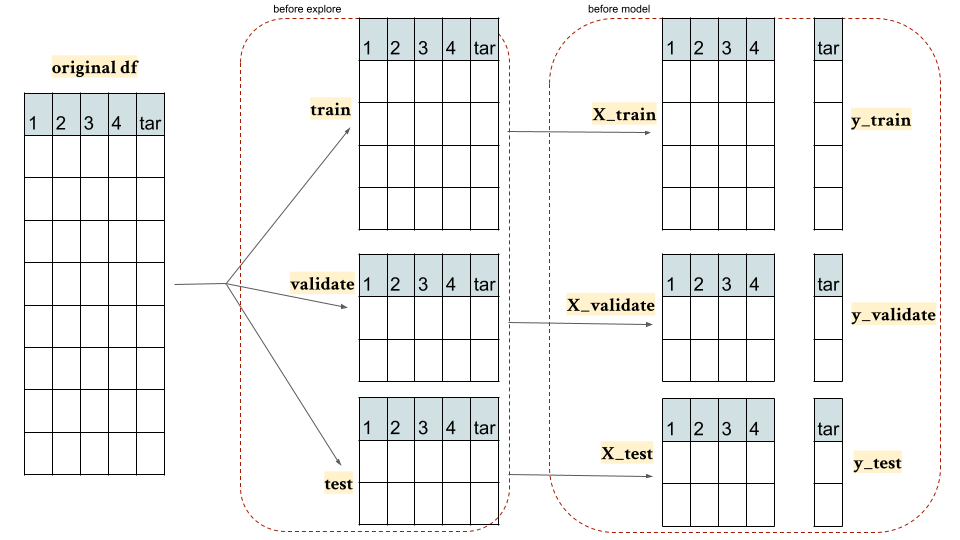

In [540]:
#look at train


For my first iteration, im going to send all possible features into my model

In [541]:
#set all my features as my X_train


In [542]:
#repeat for validate and test


In [543]:
#set target


In [544]:
#notice im sending in a single column name


In [545]:
#repeat for validate and test


Note: our X variables are dataframes, our y variables are series

#### 1. make the object

#### 2. fit the object

#### 3. transform the object

In [547]:
#see the tree that was built
#plot_tree


#### how does our model work on unseen data?

In [551]:
#score on validate


Takeaway: 

## More Modeling

We've only built one model so far. Let's build more models to find the best one!

Ways to build different models
- change hyperparameters
- change feature sets

### change a hyperparameter

decision tree hyperparameters
- max_depth: maximum number of splits (default: None)
- min_samples_split: minimum number of data points required to split a node (default: 2)
- min_samples_leaf: minimum number of data points required to be present in a endpoint or leaf (default: 1)
- max_leaf_nodes: maximum number of "endpoints", or leaves (default: None)
- criterion: how our impurity values are calculated (default:gini)

#### 1. create the object

In [553]:
#set max depth


#### 2. fit the object

In [556]:
#still using train data


#### 3. transform the object

In [557]:
#evaluate on train


In [558]:
#see the tree that was built


In [560]:
#see predictions


In [561]:
#see probability of predictions 


#### more evaluation

In [562]:
#import 


In [563]:
# confusion_matrix?

In [564]:
#y_true 


In [565]:
#y_pred


In [566]:
#generate confusion matrix!


In [570]:
#find labels in our dataset & sort


In [571]:
#make pretty with df


In [573]:
#generate classification report


#### evaluate on unseen data

In [574]:
#score our validate


### change another hyperparameter

In [576]:
#create using max_leaf_nodes

#fit

#transform


In [577]:
#plot the tree!


In [578]:
#evaluate on validate


Reminders: 

Takeaway: 

### change features

In [579]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
123,6.3,2.7,4.9,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
3,4.6,3.1,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [580]:
#set features i found in exploration


In [581]:
#see em on X_train


#### try another model! with my selected features

In [584]:
#create


#fit 
#with features


#transform 
#with features


In [585]:
#evaluate on validate 
#with features


## Finish Modeling

# use your test data ONLY ON ONE MODEL, your final bestest model

Pick best model: 


In [589]:
#evaluate on test


Conclude: 


# Reminders

Process recap:


Evaluate:
